Linear Regression
=================

A multivariate linear regression is fitted to understand the effects of the features on the normalised rank.

In [107]:
import pandas as pd
import dask.dataframe as dd

import imp

plot = imp.load_source('plot', '../src/plot.py')

In [108]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [109]:
import warnings
warnings.filterwarnings('ignore')

In [110]:
features = [
    "CC_to_C_rate",
    "CD_to_C_rate",
    "DC_to_C_rate",
    "DD_to_C_rate",
    "SSE",
    "Cooperation_rating",
    "Cooperation_rating_max",
    "Cooperation_rating_min",
    "Cooperation_rating_median",
    "Cooperation_rating_mean",
    "Cooperation_rating_comp_to_max",
    "Cooperation_rating_comp_to_min",
    "Cooperation_rating_comp_to_median",
    "Cooperation_rating_comp_to_mean",
    "repetitions",
]

# Main Paper Results

In [111]:
dfs = []
for name in ['standard', 'subset_noise', 'subset_probend', 'subset_probend_noise']:
    df = pd.read_csv(f'../data/{name}_processed.csv', index_col=0)
    df['type'] = name
    dfs.append(df)

In [112]:
types = ['standard', 'noise', 'probend', 'probend_noise']

**Standard Tournaments**

In [113]:
a_type = types[0]

df = dfs[0]
    
xs = features.copy()

xs += ["turns", "memory_usage"]

In [114]:
xs.remove('Cooperation_rating')
xs.remove('Cooperation_rating_comp_to_median')
xs.remove('Cooperation_rating_comp_to_max')
xs.remove('Cooperation_rating_median')
xs.remove('DD_to_C_rate')

In [115]:
plt.figure(figsize=(12,10))

cor = df[xs].corr()

sns.heatmap(cor, annot=True, cmap="viridis");

In [116]:
features_standard = xs.copy()

In [117]:
X = df[features_standard].values
y = df['Normalized_Rank'].values

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print("============")
print(f"{a_type}")
print("============")
print(model.summary(xname=['constant'] + xs))

standard
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                 9.851e+04
Date:                Fri, 01 Dec 2023   Prob (F-statistic):               0.00
Time:                        14:42:11   Log-Likelihood:             2.0192e+05
No. Observations:             1002803   AIC:                        -4.038e+05
Df Residuals:                 1002790   BIC:                        -4.037e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
c

**Noisy Tournaments**

In [118]:
index = 1
a_type = types[index]
df = dfs[index]
    
xs = features.copy()
xs += ['noise', 'memory_usage']

In [119]:
xs.remove('Cooperation_rating')
xs.remove('Cooperation_rating_median')
xs.remove('Cooperation_rating_comp_to_max')
xs.remove('DD_to_C_rate')

In [120]:
plt.figure(figsize=(12,10))

cor = df[xs].corr()

sns.heatmap(cor, annot=True, cmap="viridis");

In [121]:
features_noisy = xs.copy()

In [122]:
X = df[features_noisy].values
y = df['Normalized_Rank'].values

model = sm.OLS(y, X).fit()

print("============")
print(f"{a_type}")
print("============")
print(model.summary(xname=xs))

noise
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.840
Model:                            OLS   Adj. R-squared (uncentered):              0.840
Method:                 Least Squares   F-statistic:                          4.139e+04
Date:                Fri, 01 Dec 2023   Prob (F-statistic):                        0.00
Time:                        14:42:32   Log-Likelihood:                          4550.3
No. Observations:              102337   AIC:                                     -9075.
Df Residuals:                  102324   BIC:                                     -8951.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                                        coef    std err          t      P>|t|      [0.025      0.975]
------------

**Probabilistic Ending Tournaments**

In [123]:
index = 2
a_type = types[index]
df = dfs[index]
    
xs = features.copy()
xs += ["probend"]

In [124]:
xs.remove('Cooperation_rating')
xs.remove('Cooperation_rating_median')
xs.remove('Cooperation_rating_comp_to_max')
xs.remove('DD_to_C_rate')

In [125]:
plt.figure(figsize=(12,10))

cor = df[xs].corr()

sns.heatmap(cor, annot=True, cmap="viridis");

In [126]:
features_probend = xs.copy()

In [127]:
X = df[features_probend].values
y = df['Normalized_Rank'].values

model = sm.OLS(y, X).fit()

print("============")
print(f"{a_type}")
print("============")
print(model.summary(xname=xs))

probend
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.862
Model:                            OLS   Adj. R-squared (uncentered):              0.862
Method:                 Least Squares   F-statistic:                          5.120e+04
Date:                Fri, 01 Dec 2023   Prob (F-statistic):                        0.00
Time:                        14:42:46   Log-Likelihood:                          11474.
No. Observations:               98702   AIC:                                 -2.292e+04
Df Residuals:                   98690   BIC:                                 -2.281e+04
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                                        coef    std err          t      P>|t|      [0.025      0.975]
----------

**Noisy Probabilistic Ending Tournaments**

In [128]:
index = 3
a_type = types[index]
df = dfs[index]
    
xs = features.copy()
xs += ["probend", "noise"]

In [129]:
xs.remove('Cooperation_rating')
xs.remove('Cooperation_rating_median')
xs.remove('Cooperation_rating_comp_to_median')
xs.remove('Cooperation_rating_comp_to_max')
xs.remove('DD_to_C_rate')

In [130]:
plt.figure(figsize=(12,10))

cor = df[xs].corr()

sns.heatmap(cor, annot=True, cmap="viridis");

In [131]:
features_probend_noisy = xs.copy()

In [132]:
X = df[features_probend_noisy].values
y = df['Normalized_Rank'].values

model = sm.OLS(y, X).fit()

print("============")
print(f"{a_type}")
print("============")
print(model.summary(xname=xs))

probend_noise
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.882
Model:                            OLS   Adj. R-squared (uncentered):              0.882
Method:                 Least Squares   F-statistic:                              6035.
Date:                Fri, 01 Dec 2023   Prob (F-statistic):                        0.00
Time:                        14:42:55   Log-Likelihood:                          1904.0
No. Observations:                9681   AIC:                                     -3784.
Df Residuals:                    9669   BIC:                                     -3698.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
------

In [133]:
tables = []
rs = []
for i, xs in enumerate([features_standard, features_noisy, features_probend, features_probend_noisy]):
    df = dfs[i]

    X = df[xs].values
    y = df['Normalized_Rank'].values

    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    
    table = model.summary2(xname=['constant'] + xs)
    rs.append(table.tables[0][2][0] + table.tables[0][3][0])
    table = table.tables[1][['Coef.', 'P>|t|']].round(5)
    table.index = ['constant'] + [plot.features_labels[index] for index in table.index[1:]]
    
    tables.append(table)

In [135]:
regression_table = pd.concat(tables, axis=1).round(3)

In [136]:
file = open('../paper/regression_results.tex', "w")
table_to_write = regression_table.to_latex().replace('\$', '$').replace('\_', '_').replace('NaN', '  -')
file.write(table_to_write.replace('\{', '{').replace('\}', '}'))
file.close()

In [137]:
rs

['Adj. R-squared:0.541',
 'Adj. R-squared:0.373',
 'Adj. R-squared:0.457',
 'Adj. R-squared:0.537']

# Supplementary Information

In [138]:
dfs = []
for name in ['standard', 'noise', 'probend', 'probend_noise']:
    df = pd.read_csv(f'../data/{name}_processed.csv', index_col=0)
    df['type'] = name
    dfs.append(df)

In [139]:
types = ['standard', 'noise', 'probend', 'probend_noise']

**Standard Tournaments**

In [140]:
a_type = types[0]

df = dfs[0]
    
xs = features.copy()

xs += ["turns", "memory_usage"]

In [141]:
xs.remove('Cooperation_rating')
xs.remove('Cooperation_rating_comp_to_median')
xs.remove('Cooperation_rating_comp_to_max')
xs.remove('Cooperation_rating_median')
xs.remove('DD_to_C_rate')

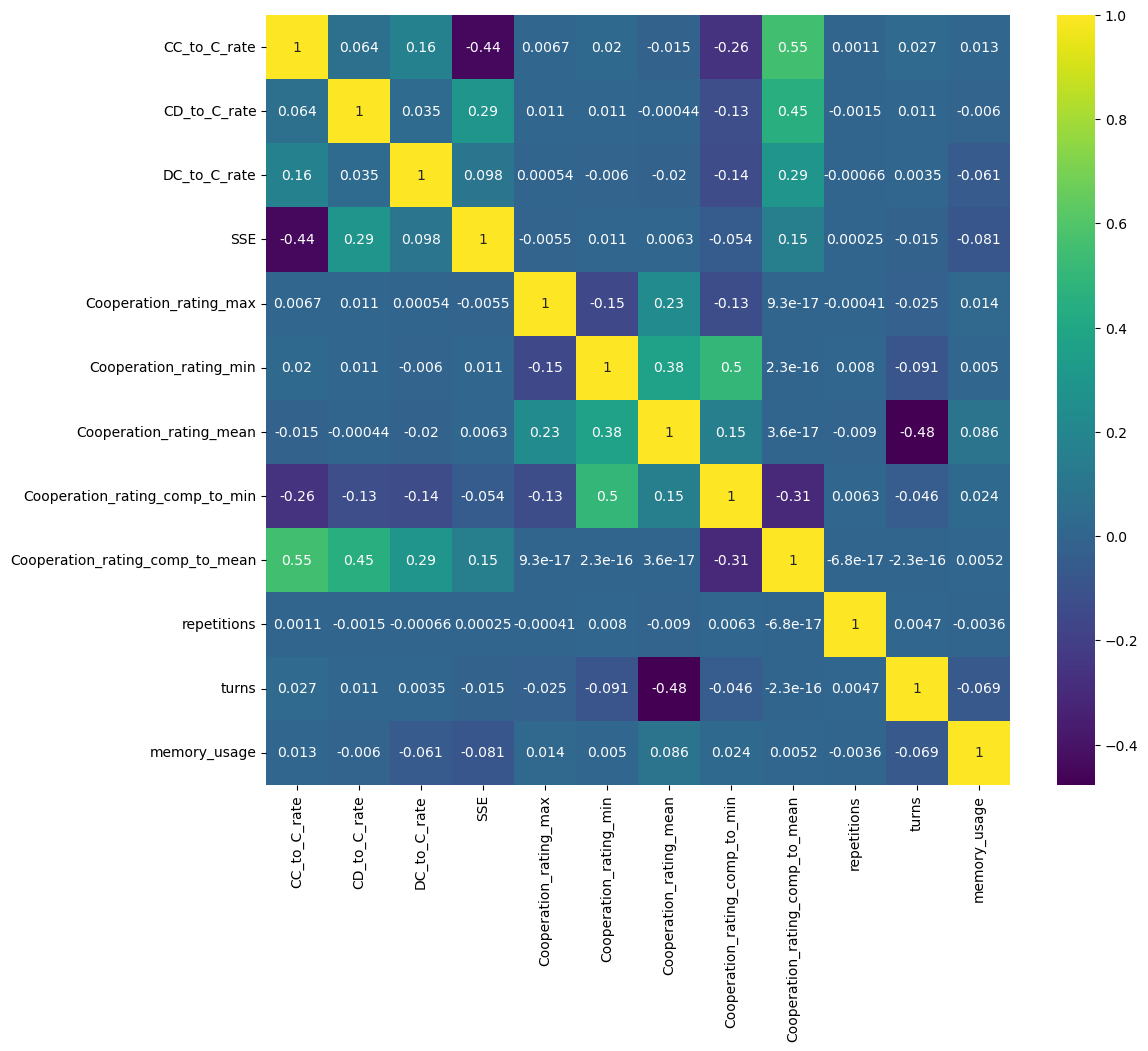

In [142]:
plt.figure(figsize=(12,10))

cor = df[xs].corr()

sns.heatmap(cor, annot=True, cmap="viridis");

In [143]:
features_standard = xs.copy()

In [144]:
X = df[features_standard].values
y = df['Normalized_Rank'].values

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print("============")
print(f"{a_type}")
print("============")
print(model.summary(xname=['constant'] + xs))

standard
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                 9.851e+04
Date:                Fri, 01 Dec 2023   Prob (F-statistic):               0.00
Time:                        14:44:21   Log-Likelihood:             2.0192e+05
No. Observations:             1002803   AIC:                        -4.038e+05
Df Residuals:                 1002790   BIC:                        -4.037e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
c

**Noisy Tournaments**

In [145]:
index = 1
a_type = types[index]
df = dfs[index]
    
xs = features.copy()
xs += ['noise', 'memory_usage']

In [146]:
xs.remove('Cooperation_rating')
xs.remove('Cooperation_rating_median')
xs.remove('Cooperation_rating_comp_to_median')
xs.remove('Cooperation_rating_comp_to_max')
xs.remove('Cooperation_rating_max')
xs.remove('DD_to_C_rate')

In [120]:
plt.figure(figsize=(12,10))

cor = df[xs].corr()

sns.heatmap(cor, annot=True, cmap="viridis");

In [147]:
features_noisy = xs.copy()

In [148]:
X = df[features_noisy].values
y = df['Normalized_Rank'].values

model = sm.OLS(y, X).fit()

print("============")
print(f"{a_type}")
print("============")
print(model.summary(xname=xs))

noise
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.894
Model:                            OLS   Adj. R-squared (uncentered):              0.894
Method:                 Least Squares   F-statistic:                          7.653e+05
Date:                Fri, 01 Dec 2023   Prob (F-statistic):                        0.00
Time:                        14:44:22   Log-Likelihood:                      2.4819e+05
No. Observations:             1002950   AIC:                                 -4.964e+05
Df Residuals:                 1002939   BIC:                                 -4.962e+05
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------

**Probabilistic Ending Tournaments**

In [149]:
index = 2
a_type = types[index]
df = dfs[index]
    
xs = features.copy()
xs += ["probend"]

In [150]:
xs.remove('Cooperation_rating')
xs.remove('Cooperation_rating_median')
xs.remove('Cooperation_rating_comp_to_median')
xs.remove('Cooperation_rating_comp_to_max')
xs.remove('DD_to_C_rate')

In [125]:
plt.figure(figsize=(12,10))

cor = df[xs].corr()

sns.heatmap(cor, annot=True, cmap="viridis");

In [151]:
features_probend = xs.copy()

In [152]:
X = df[features_probend].values
y = df['Normalized_Rank'].values

model = sm.OLS(y, X).fit()

print("============")
print(f"{a_type}")
print("============")
print(model.summary(xname=xs))

probend
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.895
Model:                            OLS   Adj. R-squared (uncentered):              0.895
Method:                 Least Squares   F-statistic:                          7.773e+05
Date:                Fri, 01 Dec 2023   Prob (F-statistic):                        0.00
Time:                        14:44:24   Log-Likelihood:                      2.5519e+05
No. Observations:             1002950   AIC:                                 -5.104e+05
Df Residuals:                 1002939   BIC:                                 -5.102e+05
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
------------

**Noisy Probabilistic Ending Tournaments**

In [153]:
index = 3
a_type = types[index]
df = dfs[index]
    
xs = features.copy()
xs += ["probend", "noise"]

In [154]:
xs.remove('Cooperation_rating')
xs.remove('Cooperation_rating_median')
xs.remove('Cooperation_rating_comp_to_median')
xs.remove('Cooperation_rating_comp_to_max')
xs.remove('Cooperation_rating_comp_to_min')
xs.remove('Cooperation_rating_min')
xs.remove('noise')
xs.remove('DD_to_C_rate')

In [130]:
plt.figure(figsize=(12,10))

cor = df[xs].corr()

sns.heatmap(cor, annot=True, cmap="viridis");

In [155]:
features_probend_noisy = xs.copy()

In [156]:
X = df[features_probend_noisy].values
y = df['Normalized_Rank'].values

model = sm.OLS(y, X).fit()

print("============")
print(f"{a_type}")
print("============")
print(model.summary(xname=xs))

probend_noise
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.866
Model:                            OLS   Adj. R-squared (uncentered):              0.866
Method:                 Least Squares   F-statistic:                          7.172e+05
Date:                Fri, 01 Dec 2023   Prob (F-statistic):                        0.00
Time:                        14:44:24   Log-Likelihood:                      1.3098e+05
No. Observations:             1002950   AIC:                                 -2.619e+05
Df Residuals:                 1002941   BIC:                                 -2.618e+05
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
------

In [157]:
tables = []
rs = []
for i, xs in enumerate([features_standard, features_noisy, features_probend, features_probend_noisy]):
    df = dfs[i]

    X = df[xs].values
    y = df['Normalized_Rank'].values

    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    
    table = model.summary2(xname=['constant'] + xs)
    rs.append(table.tables[0][2][0] + table.tables[0][3][0])
    table = table.tables[1][['Coef.', 'P>|t|']].round(5)
    table.index = ['constant'] + [plot.features_labels[index] for index in table.index[1:]]
    
    tables.append(table)

In [158]:
regression_table = pd.concat(tables, axis=1).round(3)

In [159]:
file = open('../paper/regression_results_full_dataset.tex', "w")
table_to_write = regression_table.to_latex().replace('\$', '$').replace('\_', '_').replace('NaN', '  -')
file.write(table_to_write.replace('\{', '{').replace('\}', '}'))
file.close()

In [161]:
rs

['Adj. R-squared:0.541',
 'Adj. R-squared:0.588',
 'Adj. R-squared:0.587',
 'Adj. R-squared:0.471']

In [162]:
regression_table

,Coef.,P>|t|,Coef.,P>|t|,Coef.,P>|t|,Coef.,P>|t|
constant,0.695,0.000,0.443,0.0,-0.057,0.018,0.004,0.031
$CC$ to $C$ rate,-0.042,0.000,0.150,0.0,0.017,0.000,0.197,0.000
$CD$ to $C$ rate,0.297,0.000,-0.034,0.0,0.182,0.000,0.022,0.000
$DC$ to $C$ rate,0.198,0.000,0.064,0.0,-0.030,0.000,0.090,0.000
SSE,0.258,0.000,0.237,0.0,-0.041,0.000,0.144,0.000
$C_{max}$,-0.068,0.000,NaN,NaN,-0.021,0.403,-0.090,0.000
$C_{min}$,-0.161,0.000,1.068,0.0,-0.170,0.000,NaN,NaN
$C_{mean}$,0.117,0.000,-0.722,0.0,-0.024,0.000,-0.112,0.000
$C_{min}$ / $C_r$,0.057,0.000,-0.544,0.0,0.125,0.000,NaN,NaN
$C_r$ / $C_{mean}$,-0.468,0.000,0.272,0.0,0.525,0.000,0.403,0.000
